# Project: No show appointments

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

## 1. Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It has 13 associated variables (characteristics) about the patient and the appointment made

**Question:** A person makes the effort to schedule a doctor appointment but did not turn up on their scheduled appointment, why is it so? Below are the questions that I would like to find out from the dataset to understand the possible factors that increase the chances of not showing up in their scheduled appointment.

*  Is waiting time, the day of appointment, no SMS reminder increase the chances of No-show?
*  Is there a particular group of a patient (age, gender, medical condition, handicap) more prompt to No-show?
*  Any health unit (Neighborhood) having a higher No-show rate?

Understanding the reason could help to reduce the No-show rate and thus, save operation costs for the government, as the services offered are free of charge.

In [1]:
#Import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling
Here I will clean and unify messy and complex data set for easy access and analysis

In [2]:
# Import the dataset to work 
n_app = pd.read_csv('C:/Users/valle/Desktop/ProjectUdacity/Project1/noshowappointments-kagglev2-may-2016.csv')
n_app.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
#Here we name and enumerate the columns of the dataset
for i, v in enumerate(n_app):
    print(i,v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [4]:
#To know the shape of the dataset
n_app.shape

(110527, 14)

The dataset has 110527 rows and 14 columns

In [5]:
#To obtain how many duplicate values we have in the dataset
sum(n_app.duplicated())

0

The dataset has 0 duplicate values



In [6]:
#To know if there is missing data o Non-Null values, also to check if the type of the column is the correct
n_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is 110527 entries, each column of the dataset has the same number. So we can conclude that the dataset does not have non-null values



In [7]:
#To obtain the NA's in the dataset
n_app.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset does not have NA's



In [8]:
#Because of the the characteristics only has two responses, 1 or 0. Here we can check if there is a value who does not follow this rule 
n_app.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Here we can see that the dataset is correct:

There is only two possible values for these features: Gender, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received, No_show

In [9]:
# To analyze the handcap values
n_app.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handcap is misspelled, it is talking about Handicap. Higher the Handicap, the higher the disability.


In [10]:
#Here I analyze the type of each characteristic
n_app.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [11]:
#I will change to datetime ScheduledDay and AppointmentDay because is stored as object
n_app['ScheduledDay'] = pd.to_datetime(n_app['ScheduledDay'])
n_app['AppointmentDay'] = pd.to_datetime(n_app['AppointmentDay'])

In [12]:
#I will obtain the day, day_name, month and year of the ScheduledDay and the AppointmentDay
n_app['scheduled_d'] = n_app['ScheduledDay'].dt.day
n_app['scheduled_d_name'] = n_app['ScheduledDay'].dt.day_name()
n_app['appointment_d'] = n_app['AppointmentDay'].dt.day
n_app['scheduled_m'] = n_app['ScheduledDay'].dt.month
n_app['appointment_m'] = n_app['AppointmentDay'].dt.month
n_app['scheduled_y'] = n_app['ScheduledDay'].dt.year
n_app['appointment_y'] = n_app['AppointmentDay'].dt.year

n_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,scheduled_d,scheduled_d_name,appointment_d,scheduled_m,appointment_m,scheduled_y,appointment_y
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,0,No,29,Friday,29,4,4,2016,2016
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,0,No,29,Friday,29,4,4,2016,2016
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,0,No,29,Friday,29,4,4,2016,2016
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,0,No,29,Friday,29,4,4,2016,2016
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,0,No,29,Friday,29,4,4,2016,2016


Now we have the information that we need to explorate our dataset, so these columns are giving the same information

In [13]:
#I will drop the columns that I do not need anymore
n_app.drop(['ScheduledDay', 'AppointmentDay', 'scheduled_y', 'appointment_y'], axis=1, inplace=True)

In [14]:
#Here we replace the categorical variables to numerical variables
n_app.replace({'No-show': {'Yes': 1, 'No': 0}}, inplace=True)
n_app.replace({'s_d_name': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}}, inplace=True)

### Find outliers

''

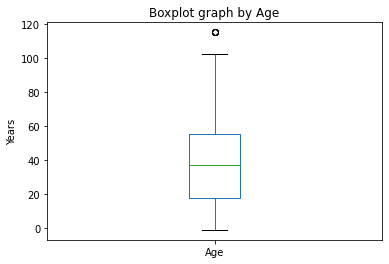

In [15]:
#Boxploy of Age to find outliers in the dataset
n_app['Age'].plot(kind='box')
plt.title('Boxplot graph by Age')
plt.ylabel('Years')
;

In [16]:
#Here I obtain the difference of gender between Male and Female
n_app.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [17]:
#Here I obtain how many people have Scholarship
n_app.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [18]:
#Here I obtain how many people have Hipertension
n_app.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [19]:
#Here I obtain how many people have Diabetes
n_app.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [20]:
#Here I obtain how many people have Alcoholism
n_app.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [21]:
#Here I obtain how many people have Handicaps
n_app.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [22]:
#Here I obtain how many people have recieved a SMS
n_app.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [23]:
#Here I obtain how many people showed or not
n_app['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

Everything is OK, but Age has outliers so I will drop those values to keep it between 1 and 100

In [24]:
n2_app = n_app.loc[n_app['Age'].apply(lambda x: x >= 1 and x <= 100)]

To check if the values of Age are in the correct range we will apply describe

In [25]:
#Here I obtain a description of the variable Age in this dataset who attend to their appointment
n2_app[ n2_app['No-show'] == 1 ].Age.describe()

count    21677.000000
mean        35.318125
std         21.451648
min          1.000000
25%         18.000000
50%         33.000000
75%         52.000000
max         98.000000
Name: Age, dtype: float64

* The mean of Age who attend to their appointment is 35.31
* The standard deviation of the people who attend to their appointment is 21.45

In [26]:
#Here I obtain a description of the variable Age in this dataset who did not attend to their appointment
n2_app[ n2_app['No-show'] == 0 ].Age.describe()

count    85303.000000
mean        39.071932
std         22.645210
min          1.000000
25%         20.000000
50%         39.000000
75%         57.000000
max        100.000000
Name: Age, dtype: float64

* The mean of Age who didn't attend to their appointment is 39.07
* The standard deviation of the people who didn't attend to their appointment is 22.64

## Exploratory Data Analysis
We will use the graphical help to find characteristics of the data, for which we will answer the questions of the beginning.

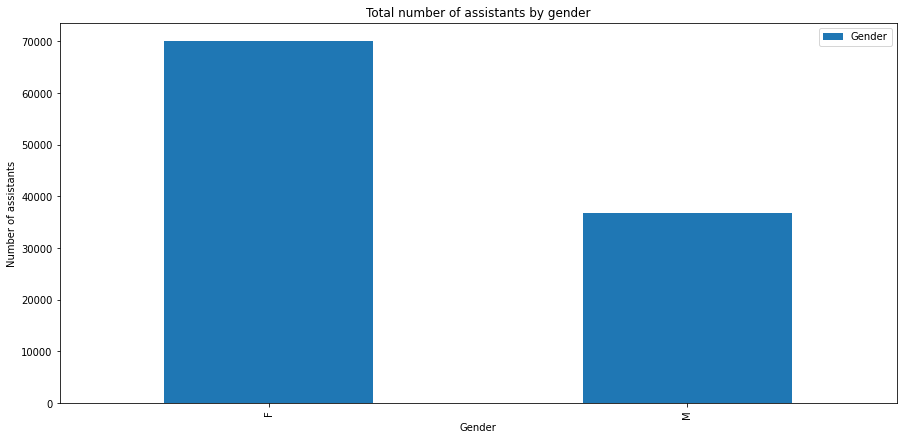

In [27]:
n2_app.Gender.value_counts().T.plot.bar(figsize=(15,7))
plt.title('Total number of assistants by gender')
plt.xlabel('Gender')
plt.ylabel('Number of assistants')
plt.legend();

### Insight 1
According to this dataset, there are around 1.9 more women who take a medical appointment than men.


### Is gender an important factor for absenteeism?


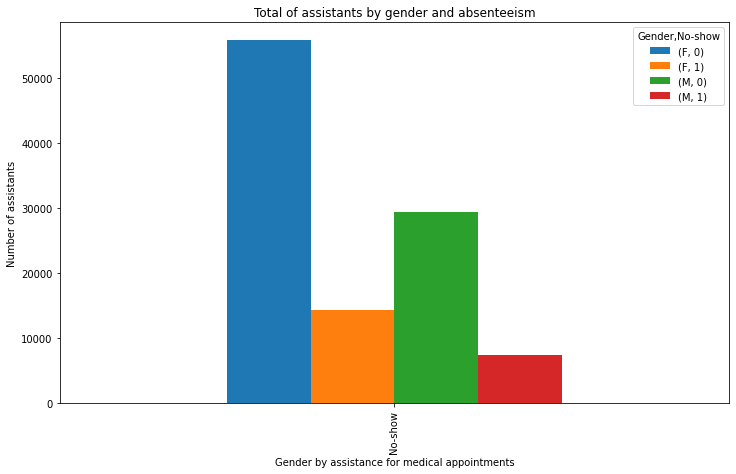

In [28]:
n2_app.groupby(['Gender', 'No-show']).agg({'No-show':'count'}).T.plot.bar(figsize=(12,7))
plt.title('Total of assistants by gender and absenteeism')
plt.xlabel('Gender by assistance for medical appointments')
plt.ylabel('Number of assistants');


### Insight 2
There are more people absent than the people who go to their appointments

### Insight 3
Although people receive a confirmation message they do not come to their medical appointment. In both cases happens the same, for men and women.

For female the absenteeism rate is around 1.159


For man the absenteeism rate is around 1.503


We can say that man do not go for their medical appointment more frecuently than women

### If a person receives a confirmation message the chances to go to the medical appointment increases?

In [29]:
n2_app.groupby(['Gender', 'SMS_received', 'No-show']).agg({'No-show':'count'})

No-show
Gender SMS_received No-show         
F      0            0          38693
                    1           7662
       1            0          17146
                    1           6610
M      0            0          21594
                    1           4447
       1            0           7870
                    1           2958

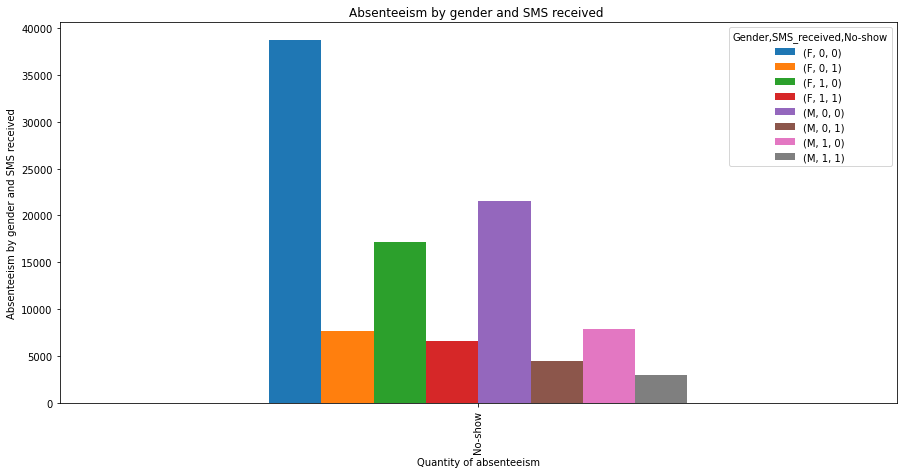

In [41]:
n2_app.groupby(['Gender', 'SMS_received', 'No-show']).agg({'No-show':'count'}).T.plot(kind='bar', figsize=(15,7))
plt.title('Absenteeism by gender and SMS received ')
plt.xlabel('Quantity of absenteeism')
plt.ylabel('Absenteeism by gender and SMS received');

### Does the scheduled day influence absenteeism?

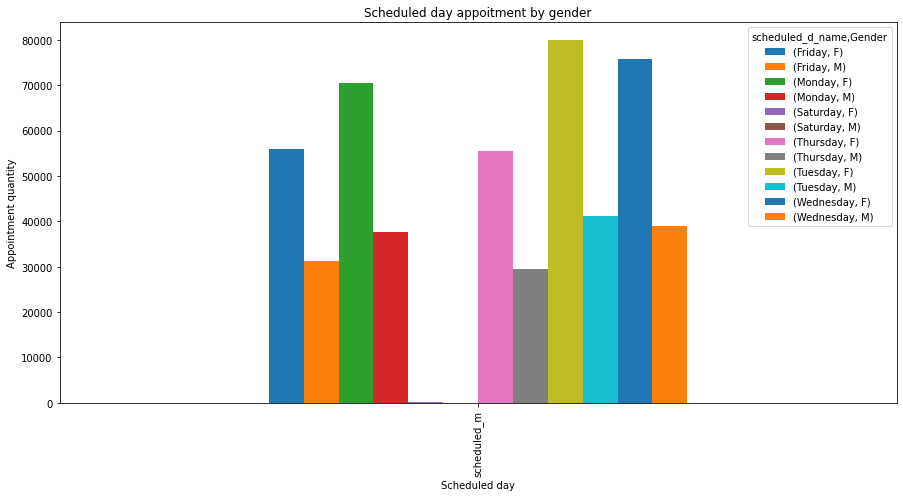

In [31]:
n2_app.groupby(['scheduled_d_name', 'Gender']).agg({'scheduled_m':'sum'}).T.plot.bar(figsize=(15,7));
plt.title('Scheduled day appoitment by gender')
plt.xlabel('Scheduled day')
plt.ylabel('Appointment quantity');

### Insight 4
For men and women the most common days to scheduled an appointment are:

* Tuesday
* Wednesday
* Monday


### Having a handicap is relevant to absenteeism?

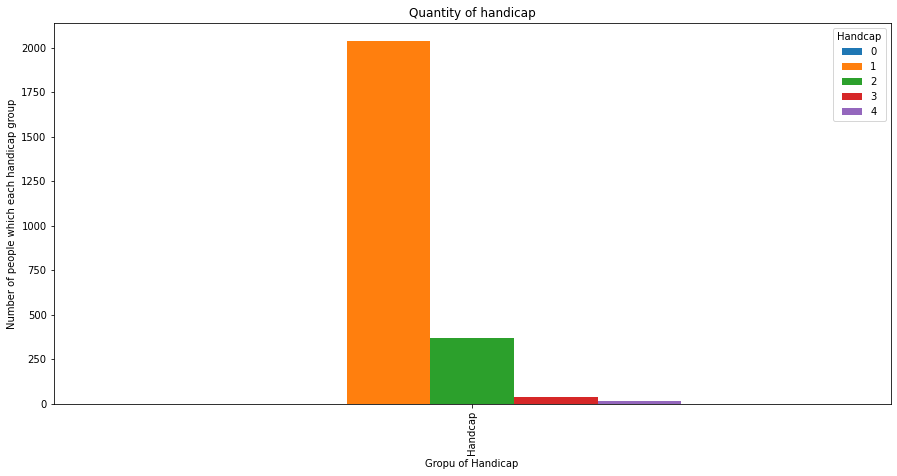

In [32]:
n2_app.groupby(['Handcap']).agg({'Handcap':'sum'}).T.plot.bar(figsize=(15,7))
plt.title('Quantity of handicap')
plt.xlabel('Gropu of Handicap')
plt.ylabel('Number of people which each handicap group');

In [33]:
n2_app.groupby(['Handcap']).agg({'Handcap':'sum'})

,Handcap
Handcap,
0,0
1,2037
2,366
3,39
4,12


### Insight 5
Here we can see that people with just 1 handicap are the most common it is around 2037 People with 2 handicaps are around 366 People with 3 hadicaps are 39 and with 4 handicaps are 12

### Insight 6
There are more man with 3 or 4 handicaps than women

### Insight 7
We can discard an assumption, people with disabilities normally do not attend their appointments



### Does having a disability and a different gender influence absenteeism?


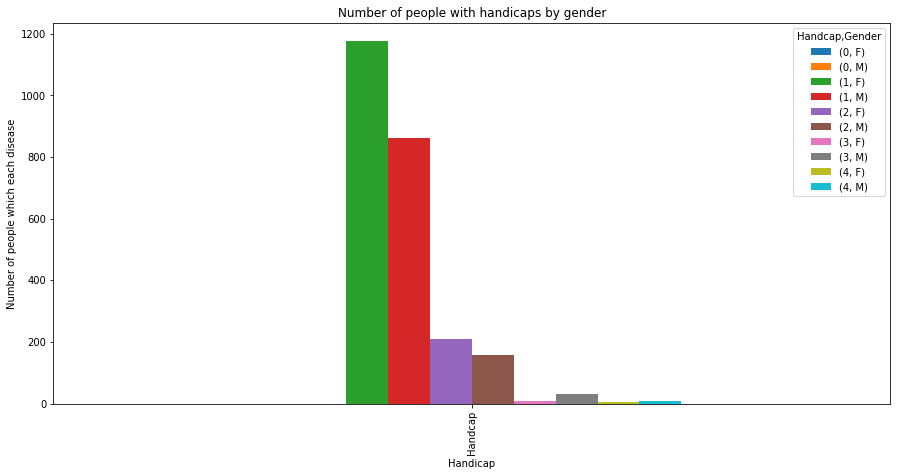

In [34]:
n2_app.groupby(['Handcap', 'Gender']).agg({'Handcap':'sum'}).T.plot.bar(figsize=(15,7))
plt.title('Number of people with handicaps by gender' )
plt.xlabel('Handicap')
plt.ylabel('Number of people which each disease');

### Does having multiple handicaps influence absenteeism?


In [35]:
n2_app.groupby(['Handcap', 'No-show']).agg({'No-show':'count'})

No-show
Handcap No-show         
0       0          83471
        1          21273
1       0           1674
        1            363
2       0            146
        1             37
3       0             10
        1              3
4       0              2
        1              1

### Does having a scholarship influence absenteeism?


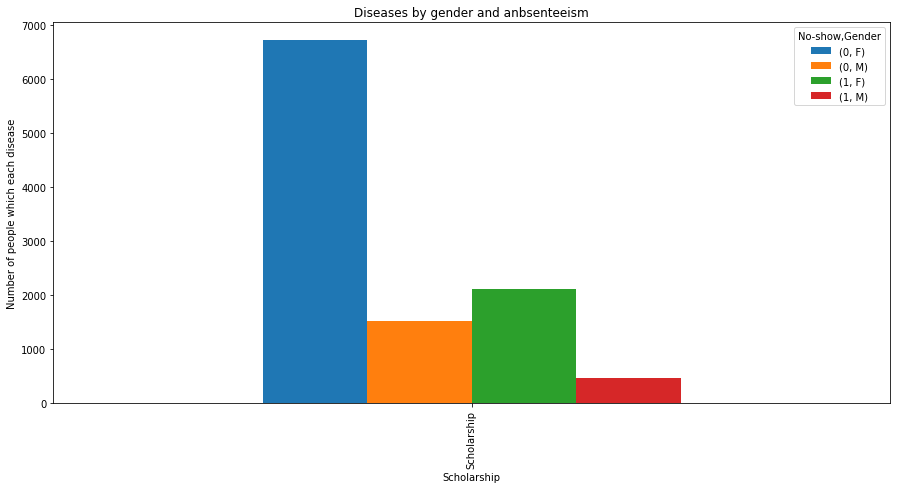

In [36]:
n2_app.groupby(['No-show', 'Gender']).agg({'Scholarship':'sum'}).T.plot.bar(figsize=(15,7))
plt.title('Diseases by gender and anbsenteeism')
plt.xlabel('Scholarship')
plt.ylabel('Number of people which each disease');

In [37]:
n2_app.groupby(['No-show', 'Gender']).agg({'Scholarship':'sum'})

Scholarship
No-show Gender             
0       F              6723
        M              1515
1       F              2103
        M               468

### Insight 8
People who has a scholarship normally do not go to their appointments There is only 23.83% of probability that a female who has a scholarship attend to her appointment There is only 23.60% of probability that a male who has a scholarship attend to her appointment



### Does having previous diseases influence absenteeism?

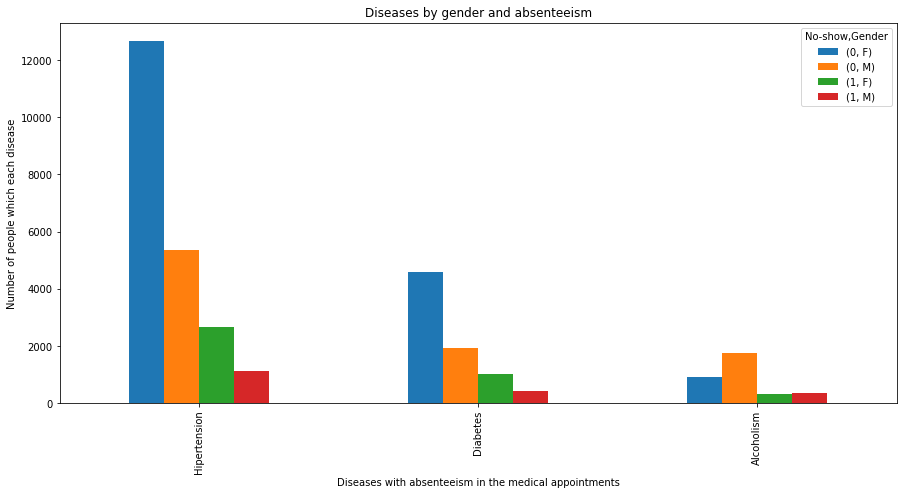

In [38]:
n2_app.groupby(['No-show', 'Gender']).agg({'Hipertension':'sum', 'Diabetes':'sum', 'Alcoholism':'sum'}).T.plot.bar(figsize=(15,7))
plt.title('Diseases by gender and absenteeism')
plt.xlabel('Diseases with absenteeism in the medical appointments')
plt.ylabel('Number of people which each disease');

In [39]:
n2_app.groupby(['No-show', 'Gender']).agg({'Hipertension':'sum', 'Diabetes':'sum', 'Alcoholism':'sum'})

Hipertension  Diabetes  Alcoholism
No-show Gender                                    
0       F              12681      4589         915
        M               5347      1924        1768
1       F               2657      1017         308
        M               1115       413         369

### Insight 9
People who has a Hipertension normally do not go to their appointments

There is only 17.32% of probability that a female who has a Hipertension attend to her appointment There is only 17.25% of probability that a male who has a Hipertension attend to his appointment

### Insight 10
People who has a Diabetes normally do not go to their appointments

There is only 18.14% of probability that a female who has a Diabetes attend to her appointment There is only 17.67% of probability that a male who has a Diabetes attend to his appointment

### Insight 11
People who has a Alcoholism normally do not go to their appointments There is only 25.18% of probability that a female who has a Alcoholism attend to her appointment There is only 17.26% of probability that a male who has a Alcoholism attend to his appointment

## Conclusions

* The absenteeism rate is high on people who have scholarships, there is a 76.17% chance that they will not keep their appointment.
* People who receive an SMS reminder has 10.31% more chances to go to their appointment.
* Handicaps are an important variable, when people has more Handicaps they attend to their appointments more often:
    * People with zero handicaps has 79.69% chances to be absent
    * People with one handicaps has 82.17% chances to be absent
    * People with two handicaps has 79.78% chances to be absent
    * People with three handicaps has 76.92% chances to be absent
    * People with three handicaps has 66.66% chances to be absent
* People who has Hipertension normally do not keep their medical appointment, there is 82.69% chance that they will be absent.
* People who has Diabetes normally do not keep their medical appointment, there is 81.99% chance that they will be absent.
* People who has Alcoholism normally do not keep their medical appointment, there is 79.85% chance that they will be absent.

## Limitations


* The dataset has some limitations, as it only contains information for the year 2016.  It is not possible to analyze the information of the neighborhood variable, because there is no exact location where the medical appointments take place. 